<a href="https://colab.research.google.com/github/Sandeep04sharma/Emotional-Analysis/blob/main/EmotionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install twitter
!pip install wordcloud
!pip install spacy
!pip install nltk

     |████████████████████████████████| 51kB 2.9MB/s 


In [ ]:
# LIBRARY TO WORK WITH TWITTER  API
#!pip install twitter
import twitter
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import unicodedata
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#import sklearn
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
STOP_WORDS.add("name")
STOP_WORDS.add("people")
STOP_WORDS.add("peopl")
STOP_WORDS.add("Im")
STOP_WORDS.add("ed")

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EmotionAnalysis/final_dataset.csv')

In [ ]:
CONSUMER_KEY = 'Ri9pFOQqXSnHm8p8IZj5QCw26'
CONSUMER_SECRET = 'hRrAioGsLbwWHp0fAmrCNZkbhOd2E3mRYeAQ6OUZlQD36y1jej'
OAUTH_TOKEN = '1258017464174219269-y9B2ac2711bcaYEHoSqi3qJ7RXGuMY'
OAUTH_TOKEN_SECRET = 'i8JW4em2QuH0e4H5Ahy9SYn0wXSBDaafDsZJrmweYc79Z'
auth = twitter.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
CONSUMER_KEY, CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth=auth)


In [ ]:
WORLD_WOE_ID = 23424977
DL_WOE_ID = 20070458
#world_trends = api.trends_place(WORLD_WOE_ID)
#dl_trends = api.trends_place(DL_WOE_ID)
world_trends = twitter_api.trends.place(_id = WORLD_WOE_ID)
delhi_trends = twitter_api.trends.place(_id = DL_WOE_ID)
#print(world_trends)
#print()
#print(delhi_trends)

In [ ]:
# #hashtag counts
def hashtag_count(x):
    hashtag=0
    word_list = x.split(' ')
    for word in word_list:
        if word.startswith('#'):
            hashtag+=1
    return hashtag


In [ ]:
# @ mentions counts
def mention_count(x):
    mentions=0
    word_list = x.split(' ')
    for word in word_list:
        if word.startswith('@'):
            mentions+=1
    return mentions


In [ ]:
# Average word length
def get_average_word_len(x):
    words_list = x.split(' ')
    word_len = 0
    for word in words_list:
        word_len+=len(word)
    return word_len/len(words_list)


In [ ]:
# contractions to expansions
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have",
"b'day" : "birthday",
"bday" : "birthday",
"don't" : "do not",
"dont" : "do not",
}

In [ ]:
def cont_to_exp(x):
    if type(x)==str:
        for key in contractions:
            value=contractions[key]
            x=x.replace(key,value)
    return x

In [ ]:
# stop word count
def stop_word_count(x):
    words_list = x.split(' ')
    #print(len(words_list))
    count=0
    for word in words_list:
        if word in STOP_WORDS:
            count+=1
    #stopwords_count_list.append(count)
    return count
    #return (' '.join([t for t in x.split(' ') if t not in STOP_WORDS]))

In [ ]:
def get_email_count(x):
    return(len(re.findall(r'[a-zA-z0-9._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+',x )))

In [ ]:
# remove emails 
def remove_email(x):
    return (re.sub(r'[a-zA-z0-9._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+',' ',x ))

In [ ]:
# Remove urls
def remove_url(x):
    return (re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','',x))

In [ ]:
# Remove accented characters
def remove_accented_chars(x):
    x=unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('ascii','ignore')
    return x

In [ ]:
def remove_non_english(x):
    return(re.sub('[^a-zA-Z0-9,.~!$%^&#@*\n ]','',x))

In [ ]:
def preprocessing(text_and_label):
    text_and_label['hashtag_count'] = text_and_label['text'].apply(hashtag_count)
    text_and_label['mentions_count'] = text_and_label['text'].apply(mention_count)
    text_and_label['word_counts'] = text_and_label['text'].apply(lambda x : len(str(x).split()))
    text_and_label['average_word_len'] = text_and_label['text'].apply(get_average_word_len)
    text_and_label['text'] = text_and_label['text'].apply(cont_to_exp)
    text_and_label['stopword_count'] = text_and_label['text'].apply(stop_word_count)
    text_and_label['text'] = text_and_label['text'].apply(lambda x: ' '.join([t for t in x.split(' ') if t not in STOP_WORDS]))
    text_and_label['email_counts'] = text_and_label['text'].apply(get_email_count)
    text_and_label['text'] = text_and_label['text'].apply(remove_email)
    text_and_label['text'] = text_and_label['text'].apply(remove_url)
    text_and_label['text'] = text_and_label['text'].apply(lambda x : re.sub('RT','',x))
    text_and_label['text'] = text_and_label['text'].apply(lambda x : re.sub('[^&a]*','&',x))
    #text_and_label['text'] = text_and_label['text'].apply(lambda x: re.sub('[^a-z A-Z 0-9-]+','',x))
    text_and_label['text'] = text_and_label['text'].apply(lambda x: " ".join(x.split(' ')))
    text_and_label['text'] = text_and_label['text'].apply(remove_accented_chars)
    text = ' '.join(text_and_label['text'])
    text = text.split(' ')
    freq = pd.Series(text).value_counts()
    x = ' '.join(text)
    wc = WordCloud(width = 800, height = 400).generate(x)
    plt.imshow(wc)
    plt.axis('off')
    plt.imshow(wc)
    plt.axis('off')
    return (text_and_label)

In [ ]:
#df = pd.read_csv('../Dataset/EmotionsWiseDataset/final_dataset.csv')
#df = pd.read_csv('/content/drive/MyDrive/Mini Project/dataset/final_dataset.csv')

In [ ]:
df.head()

,Emotion,Emotion_ID,text
0,anger,1,fuckin'm transtelecom
1,anger,1,Working But it's Fridaaaayyyyy
2,anger,1,Packing I don't like it..
3,anger,1,I tried to dye my hair and all i got was a blo...
4,anger,1,&quot;locked up abroad&quot; makes bein half b...


In [ ]:
df.describe()

,Emotion_ID
count,161344.000000
mean,4.485453
std,1.561373
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,7.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161344 entries, 0 to 161343
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Emotion     161344 non-null  object
 1   Emotion_ID  161344 non-null  int64 
 2   text        161344 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
df['Emotion'].value_counts()

Neutral     63936
Happy       30885
sad         27538
anger       15990
Surprise     9060
Fear         7973
Disgust      5962
Name: Emotion, dtype: int64

In [ ]:
df = df[df['text'].duplicated()==False]

In [ ]:
df = df.reset_index(drop = True)

(array([10170.,  3439.,  6141., 22181., 33467., 16855.,  4784.]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 <a list of 7 Patch objects>)

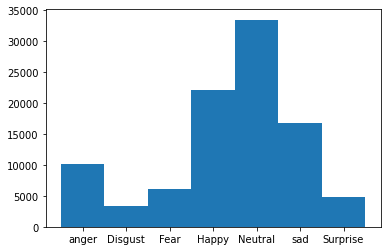

In [ ]:
plt.hist(df['Emotion'], bins = range(8), align='left')

In [ ]:
df

,Emotion,Emotion_ID,text
0,anger,1,fuckin'm transtelecom
1,anger,1,Working But it's Fridaaaayyyyy
2,anger,1,Packing I don't like it..
3,anger,1,I tried to dye my hair and all i got was a blo...
4,anger,1,&quot;locked up abroad&quot; makes bein half b...
...,...,...,...
97032,Surprise,7,If the birds are disturbed during the process ...
97033,Surprise,7,It was Blackberry who bullied the stupefied Pi...
97034,Surprise,7,"He woke stupefied , flicking his tongue over h..."
97035,Surprise,7,Laura stared up at Ross in stupefied ama


In [ ]:
preprocessing(df)

In [ ]:
df_feat = df.drop(['text', 'Emotion_ID'], axis = 1)
df_y = df['Emotion_ID']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
text_counts = cv.fit_transform(df['text'])
text_counts.toarray().shape

In [ ]:
df_bow = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())

In [ ]:
from sklearn.linear_model import SGDClassifier , LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report


In [ ]:
%%time
X, y = (df_bow, df_y)
scaler=MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
svm=LinearSVC(random_state=2,max_iter=2000)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print("SVM ---->",acc)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

SGD ----> 0.65179307502061
LR ----> 0.6641591096455071
LRCV ----> 0.6606553998351196
SVM ----> 0.6645713107996702
RFC ----> 0.6562757625721352

In [ ]:
q = world_trends[0]['trends'][random.randint(0,len(world_trends[0]['trends']))]['name']
print("Trend : ",q)
tweets = twitter_api.search.tweets(q=q + '-filter:retweets', lang='en' ,count=10, tweet_mode='extended')
query_tweets=[]
for i in range(len(tweets['statuses'])):
    query_tweets.append(tweets['statuses'][i]['full_text'])
    
q = world_trends[0]['trends'][random.randint(0,len(world_trends[0]['trends']))]['name']
print("Trend : ",q)
tweets = twitter_api.search.tweets(q=q + '-filter:retweets', lang='en' ,count=10, tweet_mode='extended')
#query_tweets=[]
for i in range(len(tweets['statuses'])):
    query_tweets.append(tweets['statuses'][i]['full_text'])
    
    
query_df = pd.DataFrame(query_tweets)
query_df.columns = ['text']
print(query_df)
new_df = query_df.copy(deep=True)
tweets_df = preprocessing(new_df)

In [ ]:
text_counts = cv.transform(tweets_df['text'])
text_counts.toarray().shape
test = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())

In [ ]:
result = svm.predict(test)

In [ ]:
result

In [ ]:
emotion = [None] * 20
for i in range(len(result)):
  if (result[i] == 1):
    emotion[i] = 'Anger'
  elif (result[i] == 2):
    emotion[i] = 'Disgust'
  elif (result[i] == 3):
    emotion[i] = 'Fear'
  elif (result[i] == 4):
    emotion[i] = 'Happy'
  elif (result[i] == 5):
    emotion[i] = 'Neutral'
  elif (result[i] == 6):
    emotion[i] = 'Sad'
  elif (result[i] == 7):
    emotion[i] = 'Surprise'

In [ ]:
query_df['Emotion'] = emotion
query_df['Emotion_ID'] = result

In [ ]:
for i in range(len(result)):
    if result[i] == 1:
        print(query_df['text'][i], '--------------   anger')
    elif result[i] == 2:
        print(query_df['text'][i],'--------------   disgust')
    elif result[i] == 3:
        print(query_df['text'][i],'--------------   fear')
    elif result[i] == 4:
        print(query_df['text'][i],'--------------   happy')
    elif result[i] == 5:
        print(query_df['text'][i],'--------------   neutral')
    elif result[i] == 6:
        print(query_df['text'][i],'--------------   sad')
    elif result[i] == 7:
        print(query_df['text'][i],'--------------   surprise')
    print('****************************************************************************************************************************\n')

In [ ]:
#query_df.to_csv('/content/drive/MyDrive/Mini Project/dataset/query_output.csv')
query_df.to_csv('./Output/query_output.csv')